<ipython-input-33-e864034843d9>:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
<ipython-input-33-e864034843d9>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')


Total Sales: 116646, Total Revenue: 78590170.24999997


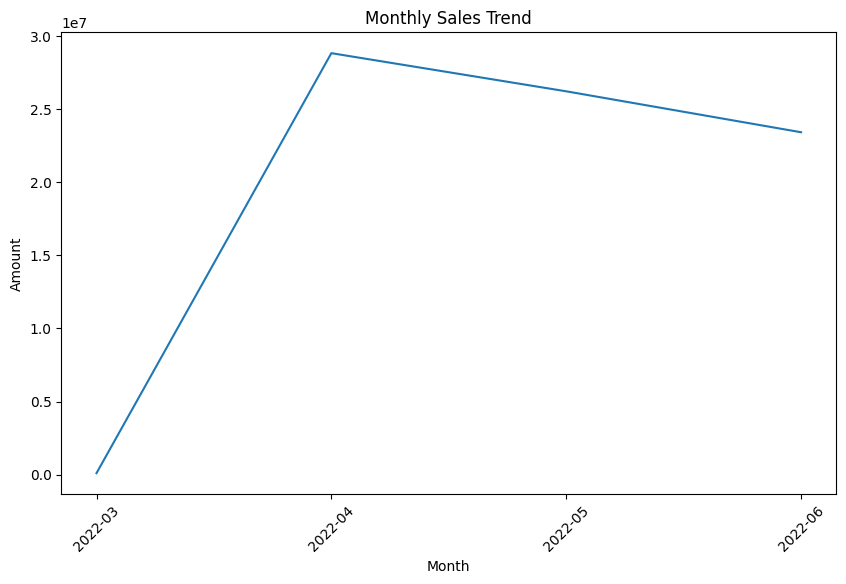

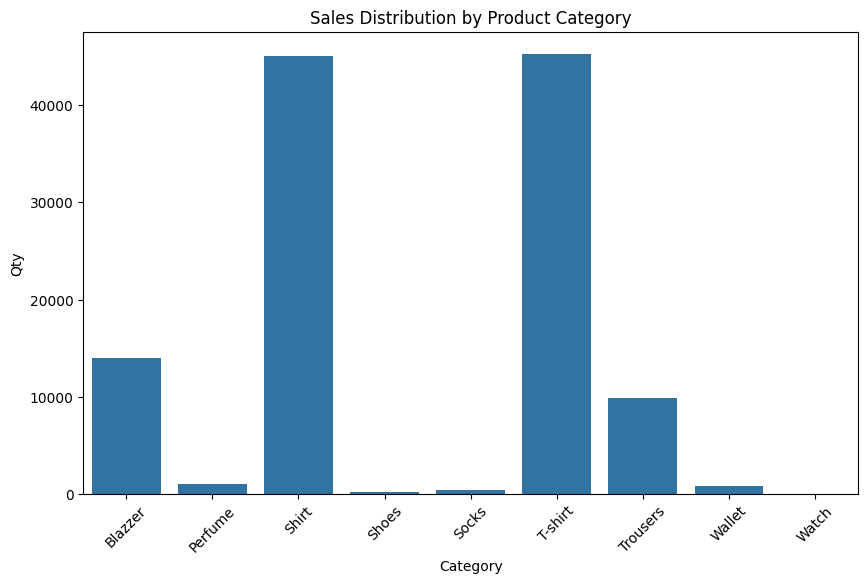

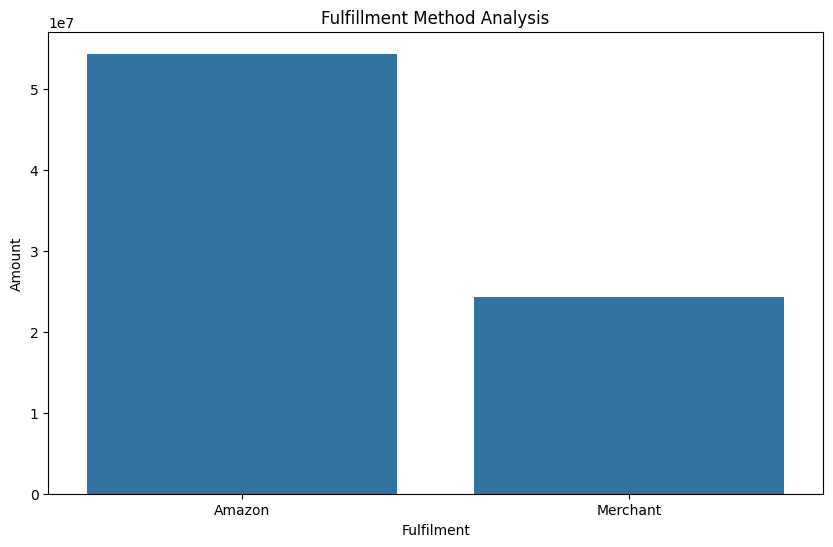

<ipython-input-33-e864034843d9>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=geo_sales, x='ship-state', y='Amount', palette='coolwarm')


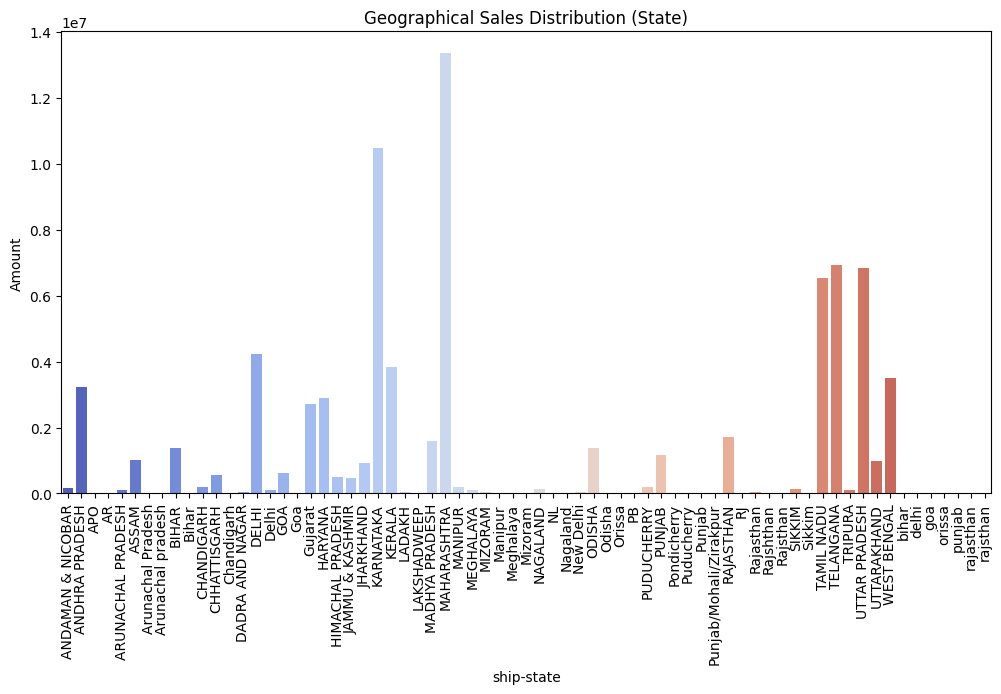

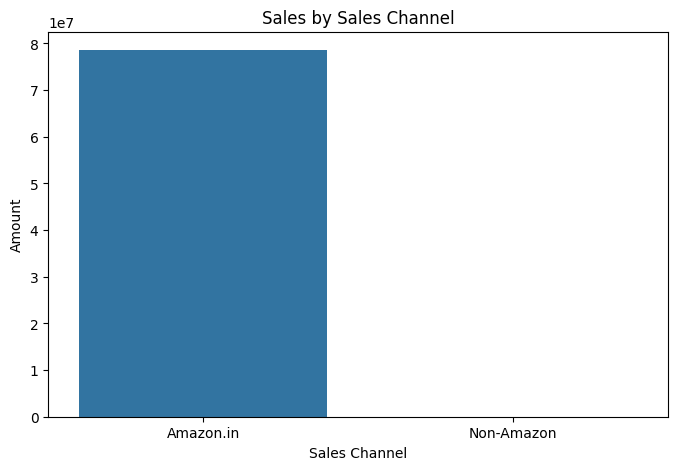

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = '/content/Amazon Sale Report (2).csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Data Preprocessing: Converting 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')

# Sales Overview: Total Sales and Revenue
total_sales = df['Qty'].sum()
total_revenue = df['Amount'].sum()
print(f'Total Sales: {total_sales}, Total Revenue: {total_revenue}')

# Monthly Sales Trend
df['Month'] = df['Date'].dt.to_period('M')
sales_trend = df.groupby('Month')['Amount'].sum().reset_index()

# Convert 'Month' column to string before plotting
sales_trend['Month'] = sales_trend['Month'].astype(str)  # Convert Period objects to strings

# Plotting Monthly Sales Trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_trend, x='Month', y='Amount')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()


# Product Analysis: Distribution of product categories
product_category_sales = df.groupby('Category')['Qty'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=product_category_sales, x='Category', y='Qty')
plt.title('Sales Distribution by Product Category')
plt.xticks(rotation=45)
plt.show()

# Fulfillment Analysis: Fulfillment Method Effectiveness
fulfillment_method = df.groupby('Fulfilment')['Amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=fulfillment_method, x='Fulfilment', y='Amount')
plt.title('Fulfillment Method Analysis')
plt.show()

# Geographical Analysis: Sales Distribution by State
geo_sales = df.groupby('ship-state')['Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=geo_sales, x='ship-state', y='Amount', palette='coolwarm')
plt.title('Geographical Sales Distribution (State)')
plt.xticks(rotation=90)
plt.show()

# Customer Segmentation based on Sales Channel
channel_sales = df.groupby('Sales Channel')['Amount'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=channel_sales, x='Sales Channel', y='Amount')
plt.title('Sales by Sales Channel')
plt.show()

# Detecting Outliers using IQR
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df['Amount'] < (Q1 - 1.5 * IQR)) | (df['Amount'] > (Q3 + 1.5 * IQR)))]

# Remove rows with NaN values in 'Amount' column from df_cleaned
df_cleaned = df_cleaned.dropna(subset=['Amount']) # Drop rows with NaN in 'Amount'

# Linear Regression for Sales Prediction
X = df_cleaned[['Qty']]
y = df_cleaned['Amount']

